In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
flight_log = pd.read_csv('flight_log.csv')
print(flight_log.head())

    time      imu_roll     imu_pitch   imu_yaw  gyro_roll_rate  \
0  0.008 -4.615680e-20 -5.559704e-19  3.141591   -5.737695e-18   
1  0.016  9.362230e-10  6.246724e-10  3.141591    1.163807e-07   
2  0.024  5.612032e-09  3.749859e-09  3.141591    5.812440e-07   
3  0.032  1.868748e-08  1.250089e-08  3.141591    1.625392e-06   
4  0.040  4.666902e-08  3.124558e-08  3.141591    3.478352e-06   

   gyro_pitch_rate  gyro_yaw_rate         gps_x         gps_y  gps_altitude  \
0    -6.911199e-17   1.421584e-17  0.000000e+00 -1.990527e-20      0.099372   
1     7.765226e-08   9.530601e-09 -2.274833e-11  2.947241e-11      0.098120   
2     3.884882e-07   4.759828e-08 -1.365560e-10  1.766677e-10      0.096247   
3     1.087830e-06   1.331024e-07 -4.552361e-10  5.882859e-10      0.093756   
4     2.330129e-06   2.848378e-07 -1.137849e-09  1.469154e-09      0.090652   

     motor_fl    motor_fr    motor_rl    motor_rr  target_altitude  \
0  576.000000  576.000000  576.000000  576.000000         

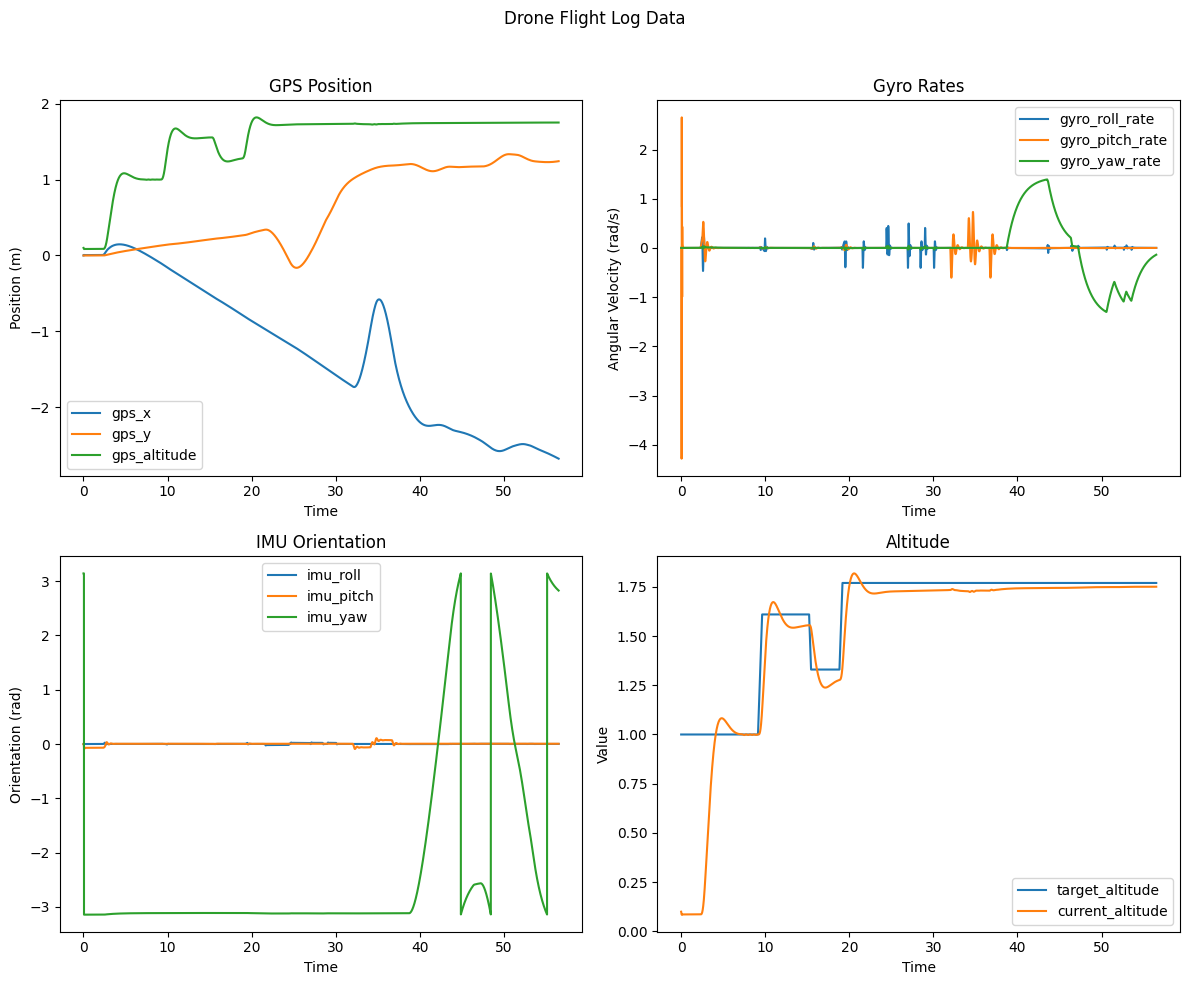

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the flight log data
flight_log = pd.read_csv("flight_log.csv")

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Drone Flight Log Data")

# First subplot: GPS data
axs[0, 0].plot(flight_log['time'], flight_log['gps_x'], label='gps_x')
axs[0, 0].plot(flight_log['time'], flight_log['gps_y'], label='gps_y')
axs[0, 0].plot(flight_log['time'], flight_log['gps_altitude'], label='gps_altitude')
axs[0, 0].set_title("GPS Position")
axs[0, 0].legend()
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Position (m)")

# Second subplot: Gyro rates
axs[0, 1].plot(flight_log['time'], flight_log['gyro_roll_rate'], label='gyro_roll_rate')
axs[0, 1].plot(flight_log['time'], flight_log['gyro_pitch_rate'], label='gyro_pitch_rate')
axs[0, 1].plot(flight_log['time'], flight_log['gyro_yaw_rate'], label='gyro_yaw_rate')
axs[0, 1].set_title("Gyro Rates")
axs[0, 1].legend()
axs[0, 1].set_xlabel("Time")
axs[0, 1].set_ylabel("Angular Velocity (rad/s)")

# Third subplot: IMU data
axs[1, 0].plot(flight_log['time'], flight_log['imu_roll'], label='imu_roll')
axs[1, 0].plot(flight_log['time'], flight_log['imu_pitch'], label='imu_pitch')
axs[1, 0].plot(flight_log['time'], flight_log['imu_yaw'], label='imu_yaw')
axs[1, 0].set_title("IMU Orientation")
axs[1, 0].legend()
axs[1, 0].set_xlabel("Time")
axs[1, 0].set_ylabel("Orientation (rad)")

# Fourth subplot: Target vs Current Altitude and Disturbances
axs[1, 1].plot(flight_log['time'], flight_log['target_altitude'], label='target_altitude')
axs[1, 1].plot(flight_log['time'], flight_log['gps_altitude'], label='current_altitude')
axs[1, 1].set_title("Altitude")
axs[1, 1].legend()
axs[1, 1].set_xlabel("Time")
axs[1, 1].set_ylabel("Value")

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # rect keeps the main title from overlapping
plt.show()

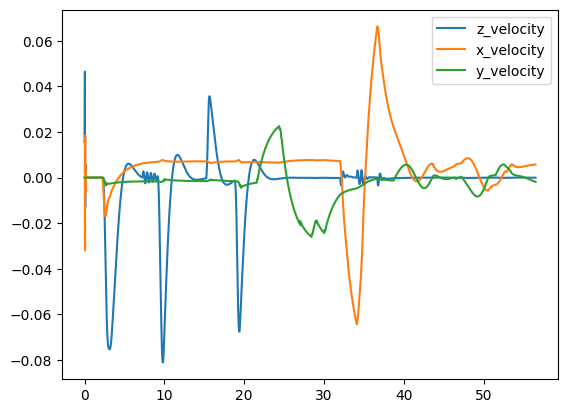

In [29]:
flight_log["shifted_z"] = flight_log['gps_altitude'].shift(1)
flight_log["shifted_x"] = flight_log['gps_x'].shift(1)
flight_log["shifted_y"] = flight_log['gps_y'].shift(1)

flight_log.fillna(0, inplace=True)

flight_log["z_velocity"] = (flight_log["shifted_z"] - flight_log["gps_altitude"]) / 0.08
flight_log["x_velocity"] = (flight_log["shifted_x"] - flight_log["gps_x"]) / 0.08
flight_log["y_velocity"] = (flight_log["shifted_y"] - flight_log["gps_y"]) / 0.08


plt.plot(flight_log['time'][1:], flight_log['z_velocity'][1:], label='z_velocity')
plt.plot(flight_log['time'][1:], flight_log['x_velocity'][1:], label='x_velocity')
plt.plot(flight_log['time'][1:], flight_log['y_velocity'][1:], label='y_velocity')
plt.legend()